In [36]:
from sklearn import preprocessing
import pandas as pd
import numpy as np # we'll need it later
#Load the Boston dataset.

from sklearn.datasets import load_boston

boston = load_boston()
X,y = boston.data, boston.target

X_feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B1000','LSTAT']


bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [37]:
#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

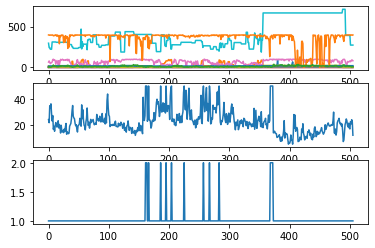

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(311)
plt.plot(X)
plt.subplot(312)
plt.plot(y)
plt.subplot(313)
plt.plot(binned_y)

In [39]:
from sklearn.ensemble import RandomForestRegressor

rft = RandomForestRegressor()
rft.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred = rft.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.505205882352941

In [41]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.13946975494599032

In [42]:
rft.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=320551303),
 DecisionTreeRegressor(max_features='auto', random_state=135635281),
 DecisionTreeRegressor(max_features='auto', random_state=1822494747),
 DecisionTreeRegressor(max_features='auto', random_state=1918669308),
 DecisionTreeRegressor(max_features='auto', random_state=677552873),
 DecisionTreeRegressor(max_features='auto', random_state=2128196894),
 DecisionTreeRegressor(max_features='auto', random_state=1606144986),
 DecisionTreeRegressor(max_features='auto', random_state=1838125581),
 DecisionTreeRegressor(max_features='auto', random_state=1723308109),
 DecisionTreeRegressor(max_features='auto', random_state=1551557929),
 DecisionTreeRegressor(max_features='auto', random_state=1805452481),
 DecisionTreeRegressor(max_features='auto', random_state=267521730),
 DecisionTreeRegressor(max_features='auto', random_state=1524107211),
 DecisionTreeRegressor(max_features='auto', random_state=1367028646),
 DecisionTreeRegressor(m

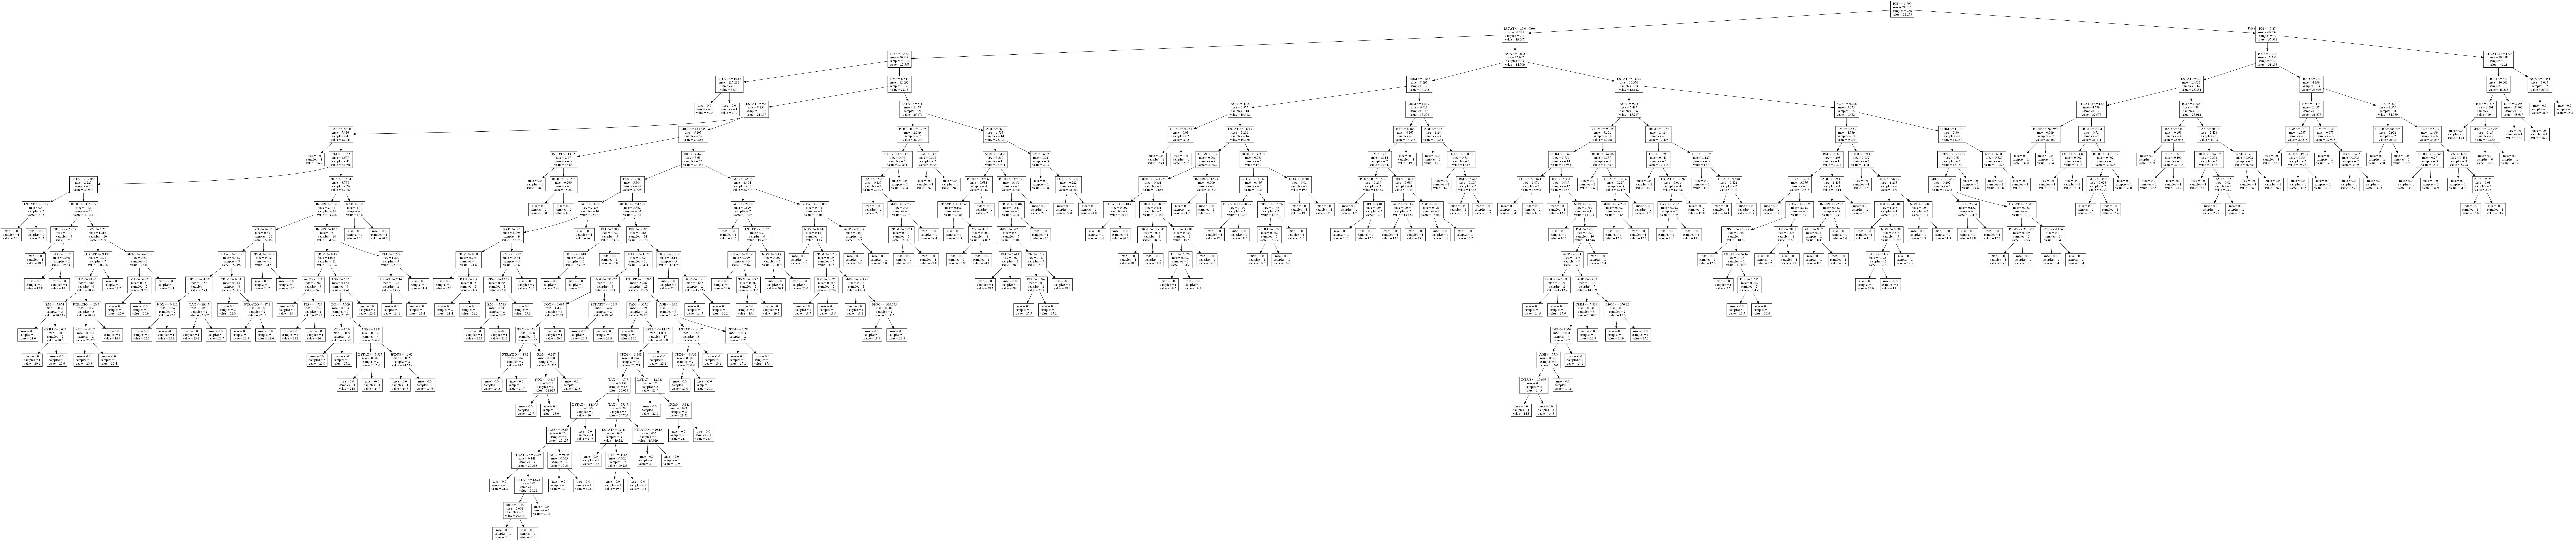

In [43]:
import numpy as np
from sklearn import tree
from six import StringIO

import pydot
from IPython.display import Image
import pydotplus

dot_diabetes = StringIO()
#tree.export_graphviz(rft.estimators_[0], out_file = dot_diabetes, feature_names = X_feature_names)
#graph = pydot.graph_from_dot_data(dot_diabetes.getvalue())
tree.export_graphviz(rft.estimators_[0], out_file = dot_diabetes, feature_names=X_feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_diabetes.getvalue())
                              
graph.progs = {'dot': u"C:\\Program Files\\Graphviz\\bin\\dot.exe"}
Image(graph.create_png())

In [45]:
rft.feature_importances_

array([0.0255197 , 0.0013714 , 0.00686419, 0.00134779, 0.03274796,
       0.43246556, 0.01361962, 0.04516565, 0.006188  , 0.01855002,
       0.01837316, 0.01441485, 0.38337209])

[Text(0, 0, 'CRIM'),
 Text(1, 0, 'ZN'),
 Text(2, 0, 'INDUS'),
 Text(3, 0, 'CHAS'),
 Text(4, 0, 'NOX'),
 Text(5, 0, 'RM'),
 Text(6, 0, 'AGE'),
 Text(7, 0, 'DIS'),
 Text(8, 0, 'RAD'),
 Text(9, 0, 'TAX'),
 Text(10, 0, 'PTRATIO'),
 Text(11, 0, 'B1000'),
 Text(12, 0, 'LSTAT')]

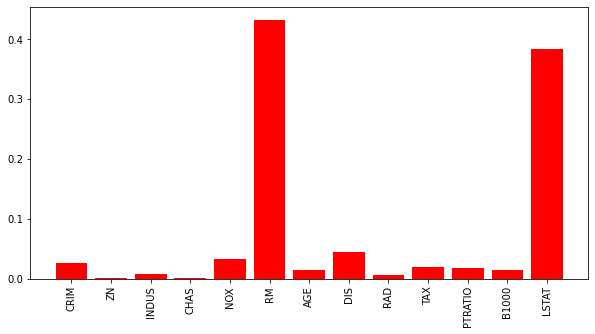

In [49]:
fig, ax = plt.subplots(figsize=(10,5))

bar_rects = ax.bar(np.arange(13), rft.feature_importances_,color='r',align='center')
ax.xaxis.set_ticks(np.arange(13))
ax.set_xticklabels(X_feature_names, rotation='vertical')